# Chapter 5: Support Vector Machines

## First problem

### "Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model"

In [2]:
#Importing the Iris dataset:

from sklearn.datasets import load_iris

data = load_iris()

The Iris Dataset is structured in a way that the four columns on the data correspond to the features: Sepal Length, Sepal Width, Petal Length and Petal Width

We will compare the labels "Setosa" (y=0) and "Versicolor" (y=1), using the Petal Length and Petal Width features

In [3]:
X = data['data'][:,(2,3)]
y = data['target']

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

To only select the Iris Setosa and Iris Versicolor, we'll do a mask which sets to True only the values that have these labels

In [5]:
set_vers_mask = ~(y==2)
set_vers_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [6]:
#Now passing the mask to our data:
X = X[set_vers_mask]
y = y[set_vers_mask]

Now let's make a plot to visualize our datapoints for each label 

In [7]:
setosa = y==0

In [8]:
setosa

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

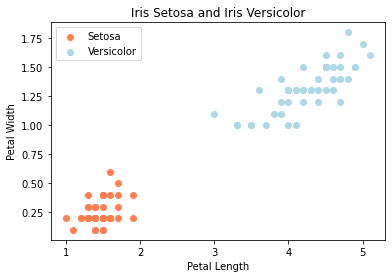

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X[setosa,0],X[setosa,1], c='coral', label = 'Setosa')

plt.scatter(X[~setosa,0],X[~setosa,1], c='lightblue', label = 'Versicolor')

plt.title('Iris Setosa and Iris Versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

The features seem to have different scales, which for a Linear SVM may be a downside

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

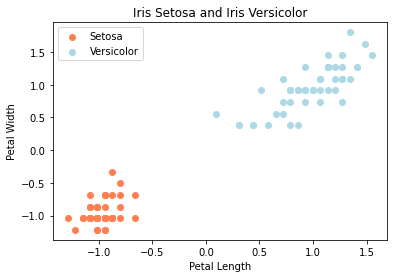

In [11]:
#Plot:
plt.scatter(X_scaled[setosa,0],X_scaled[setosa,1], c='coral', label = 'Setosa')

plt.scatter(X_scaled[~setosa,0],X_scaled[~setosa,1], c='lightblue', label = 'Versicolor')

plt.title('Iris Setosa and Iris Versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

Now we will train our model and test it with the data

In [12]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_scaled,y)

LinearSVC()

In [13]:
#Let's see decision boundary intercept and the weights given to both features:
print(f'Linear SVC intercept: {linear_svc.intercept_}')
print(f'Linear SVC weights: {linear_svc.coef_}')

Linear SVC intercept: [0.26071578]
Linear SVC weights: [[0.90015406 0.83425212]]


In [14]:
w1 = -linear_svc.coef_[0, 0]/linear_svc.coef_[0, 1]
b1 = -linear_svc.intercept_[0]/linear_svc.coef_[0, 1]

In [15]:
dboundary = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
dboundary

array([[-11.56182566,   6.67767494],
       [ 17.28382566,  -5.45714124]])

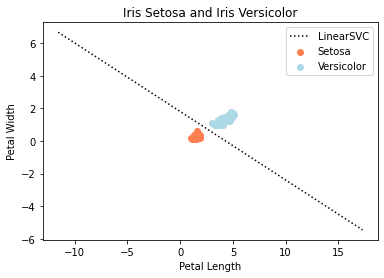

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X[setosa,0],X[setosa,1], c='coral', label = 'Setosa')

plt.scatter(X[~setosa,0],X[~setosa,1], c='lightblue', label = 'Versicolor')

plt.plot(dboundary[:, 0], dboundary[:, 1], "k:", label="LinearSVC")

plt.title('Iris Setosa and Iris Versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

Now the SVC

In [17]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_scaled,y)

SVC(kernel='linear')

In [18]:
print(f'Linear SVC intercept: {svc.intercept_}')
print(f'Linear SVC weights: {svc.coef_}')

Linear SVC intercept: [0.32182521]
Linear SVC weights: [[1.04342638 0.94747825]]


In [19]:
w2 = -svc.coef_[0, 0]/svc.coef_[0, 1]
b2 = -svc.intercept_[0]/svc.coef_[0, 1]

In [20]:
dboundary_svc = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
dboundary_svc

array([[-11.56182566,   6.78764539],
       [ 17.28382566,  -5.59764638]])

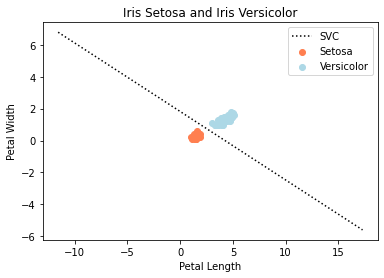

In [21]:
import matplotlib.pyplot as plt

plt.scatter(X[setosa,0],X[setosa,1], c='coral', label = 'Setosa')

plt.scatter(X[~setosa,0],X[~setosa,1], c='lightblue', label = 'Versicolor')

plt.plot(dboundary_svc[:, 0], dboundary_svc[:, 1], "k:", label="SVC")

plt.title('Iris Setosa and Iris Versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

Finally we get to the SGDClassifier

In [22]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()

sgdc.fit(X_scaled, y)

SGDClassifier()

In [23]:
#Getting the weights and intercept:
print(f'SGDC intercept: {sgdc.intercept_}')
print(f'SGDC intercept weights: {sgdc.coef_}')

SGDC intercept: [-0.31945789]
SGDC intercept weights: [[8.16180591 7.3269121 ]]


In [24]:
w3 = -sgdc.coef_[0, 0]/sgdc.coef_[0, 1]
b3 = -sgdc.intercept_[0]/sgdc.coef_[0, 1]

In [25]:
dboundary_sgdc = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])
dboundary_sgdc

array([[-11.56182566,   7.0744773 ],
       [ 17.28382566,  -5.45344228]])

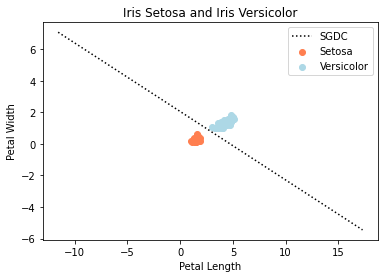

In [26]:
plt.scatter(X[setosa,0],X[setosa,1], c='coral', label = 'Setosa')

plt.scatter(X[~setosa,0],X[~setosa,1], c='lightblue', label = 'Versicolor')

plt.plot(dboundary_sgdc[:, 0], dboundary_sgdc[:, 1], "k:", label="SGDC")

plt.title('Iris Setosa and Iris Versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

### "Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?"

In [27]:
# Importing the MNIST dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)

In [28]:
#Unpacking the data:
X,y = mnist['data'],mnist['target']
X,y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [34]:
#Splittiing train and test sets
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [36]:
from sklearn.svm import LinearSVC
mnist_svm = LinearSVC()
mnist_svm.fit(X_train, y_train)

LinearSVC()

In [38]:
#Let´s check the accuracy of the predictions using the training set
from sklearn.metrics import accuracy_score
y_predicted = mnist_svm.predict(X_train)
accuracy_score(y_train,y_predicted)


0.88575

In [39]:
#Lets see what happens if we scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [45]:
#Let´s try a SVC
svm_clf = SVC(decision_function_shape="ovr", gamma="auto")
svm_clf.fit(X_train_scaled, y_train)

SVC(gamma='auto')

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=6.432887458399756, gamma=0.0029786126795930826 ................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] . C=6.432887458399756, gamma=0.0029786126795930826, total=   0.8s
[CV] C=6.432887458399756, gamma=0.0029786126795930826 ................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[CV] . C=6.432887458399756, gamma=0.0029786126795930826, total=   0.7s
[CV] C=6.432887458399756, gamma=0.0029786126795930826 ................
[CV] . C=6.432887458399756, gamma=0.0029786126795930826, total=   0.8s
[CV] C=4.031141851382849, gamma=0.02707078430250584 ..................
[CV] ... C=4.031141851382849, gamma=0.02707078430250584, total=   0.8s
[CV] C=4.031141851382849, gamma=0.02707078430250584 ..................
[CV] ... C=4.031141851382849, gamma=0.02707078430250584, total=   0.9s
[CV] C=4.031141851382849, gamma=0.02707078430250584 ................

RandomizedSearchCV(cv=3, estimator=SVC(gamma='auto'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa0005bb6a0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa003329d90>},
                   verbose=2)

In [52]:
#After doing the randomized search, we´ll use the best parameters to train the classifier

rnd_search_cv.best_estimator_.fit(X_train_scaled,y_train)

SVC(C=7.267451743650994, gamma=0.0013446896760488428)

In [54]:
y_predicted = rnd_search_cv.best_estimator_.predict(X_train_scaled)


In [55]:
accuracy_score(y_predicted,y_train)

0.9986833333333334

In [56]:
# Finally, we use the test set and make predictions
y_predicted = rnd_search_cv.best_estimator_.predict(X_test_scaled)

In [57]:
accuracy_score(y_predicted,y_test)

0.9728

Pretty nice accuracy score, but I am almost certain that the model is overfitting the data